In [43]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# From: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

df = pd.read_csv('./data/movie_metadata.csv')
print(df.columns)
df.head(2)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [45]:
# Add a readable column
df['readable_gross'] = df['gross'].map('{:,.2f}'.format)

# Get rid of any row with a null value
print(df.isnull().sum())
df.dropna(inplace=True)
print("===CLEANED===")
print(df.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
readable_gross                 0
dtype: int64
===CLEANED===
color           

In [47]:
# Explore the data
df.sort_values('gross', ascending=0)[['title_year', 'readable_gross', 'budget', 'movie_title']]

,title_year,readable_gross,budget,movie_title
0,2009.0,"760,505,847.00",237000000.0,Avatar
26,1997.0,"658,672,302.00",200000000.0,Titanic
29,2015.0,"652,177,271.00",150000000.0,Jurassic World
794,2012.0,"623,279,547.00",220000000.0,The Avengers
17,2012.0,"623,279,547.00",220000000.0,The Avengers
66,2008.0,"533,316,061.00",185000000.0,The Dark Knight
240,1999.0,"474,544,677.00",115000000.0,Star Wars: Episode I - The Phantom Menace
3024,1977.0,"460,935,665.00",11000000.0,Star Wars: Episode IV - A New Hope
8,2015.0,"458,991,599.00",250000000.0,Avengers: Age of Ultron
3,2012.0,"448,130,642.00",250000000.0,The Dark Knight Rises


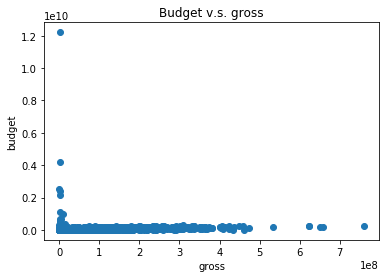

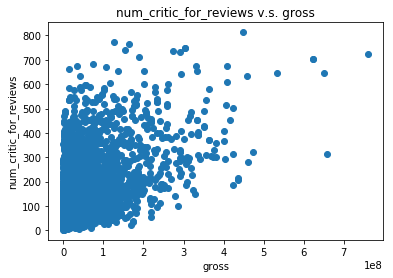

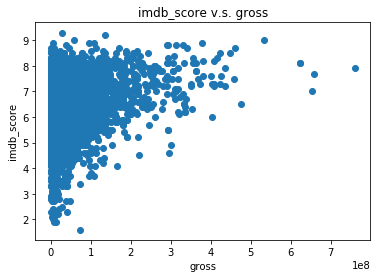

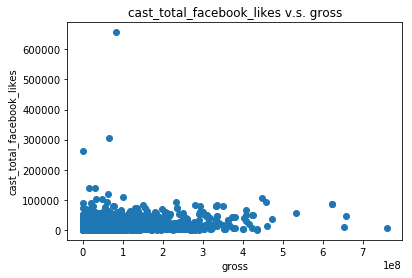

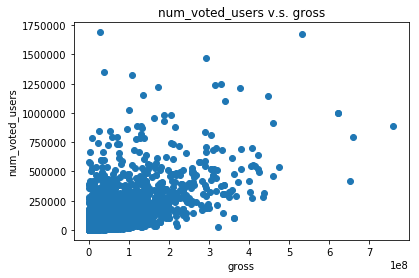

In [63]:
plt.scatter(df.gross, df.budget)
plt.title("Budget v.s. gross")
plt.ylabel("budget")
plt.xlabel("gross")
plt.show()

plt.scatter(df.gross, df.num_critic_for_reviews)
plt.title("num_critic_for_reviews v.s. gross")
plt.ylabel("num_critic_for_reviews")
plt.xlabel("gross")
plt.show()

plt.scatter(df.gross, df.imdb_score)
plt.title("imdb_score v.s. gross")
plt.ylabel("imdb_score")
plt.xlabel("gross")
plt.show()

plt.scatter(df.gross, df.cast_total_facebook_likes)
plt.title("cast_total_facebook_likes v.s. gross")
plt.ylabel("cast_total_facebook_likes")
plt.xlabel("gross")
plt.show()

plt.scatter(df.gross, df.num_voted_users)
plt.title("num_voted_users v.s. gross")
plt.ylabel("num_voted_users")
plt.xlabel("gross")
plt.show()

In [ ]:
# build a KNN Regression and an OLS regression
# Compare the two. How similar are they? Do they miss in different ways?